# Pandas DataFrame
This notebook illustrates how to conduct data analysis using DataFrame.  The contents are discussed in the following order:

- Data Preparation: DataFrame creation, indexing, and data transformation. 
- Data Wrangling: Useful methods, tidy data, read data in chunk, groupby, and groupby object.
- Data Visualizations with DataFrame: Plotting with Pandas, customization, DataFrame plot idioms, and PDF/CDF

In each section, appropriate datasets are used to demonstrate the functionalities and outputs.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Data Preparation
### DataFrame Creation

In [2]:
# Create DataFrame from list and dictionary
index = ['A','B','C','D']
col1 = [10,20,30,40]
col2 = [1.0,0.9,0.8,0.7]
col3 = ['a','b','c','d']
col4 = [12.3, 45.6, 78.9, 123.4]

list_lables = ['index', 'col1', 'col2', 'col3', 'col4']
list_cols = [index, col1, col2, col3, col4]
zipped = list(zip(list_lables, list_cols))
zipped

[('index', ['A', 'B', 'C', 'D']),
 ('col1', [10, 20, 30, 40]),
 ('col2', [1.0, 0.9, 0.8, 0.7]),
 ('col3', ['a', 'b', 'c', 'd']),
 ('col4', [12.3, 45.6, 78.9, 123.4])]

In [3]:
my_dict = dict(zipped)
my_dict

{'index': ['A', 'B', 'C', 'D'],
 'col1': [10, 20, 30, 40],
 'col2': [1.0, 0.9, 0.8, 0.7],
 'col3': ['a', 'b', 'c', 'd'],
 'col4': [12.3, 45.6, 78.9, 123.4]}

In [4]:
df = pd.DataFrame(my_dict)
df

,index,col1,col2,col3,col4
0,A,10,1.0,a,12.3
1,B,20,0.9,b,45.6
2,C,30,0.8,c,78.9
3,D,40,0.7,d,123.4


#### Converting data types

In [5]:
# Convert to string
df['col1_str'] = df['col1'].astype(str)
df.col1_str # object = string

0    10
1    20
2    30
3    40
Name: col1_str, dtype: object

In [6]:
# Convert to numeric
df['col4'] = pd.to_numeric(df['col1_str'], errors = 'coerce')
df.col4

0    10
1    20
2    30
3    40
Name: col4, dtype: int64

In [7]:
# Convert categorical data to 'category' dtype:
df['col3'] = df['col3'].astype('category')
df.col3

0    a
1    b
2    c
3    d
Name: col3, dtype: category
Categories (4, object): ['a', 'b', 'c', 'd']

#### Create index

In [8]:
# Method 1
df1 = df.copy()
df1.index = df1['index']
del df1['index']
df1

,col1,col2,col3,col4,col1_str
index,,,,,
A,10,1.0,a,10,10
B,20,0.9,b,20,20
C,30,0.8,c,30,30
D,40,0.7,d,40,40


In [9]:
# Method 2
df2 = df.set_index(['index'])
df2

,col1,col2,col3,col4,col1_str
index,,,,,
A,10,1.0,a,10,10
B,20,0.9,b,20,20
C,30,0.8,c,30,30
D,40,0.7,d,40,40


In [10]:
df = df.set_index(['index'])

#### Create new columns from other columns

In [11]:
df['total'] = df.sum(axis = 'columns')
df

,col1,col2,col3,col4,col1_str,total
index,,,,,,
A,10,1.0,a,10,10,21.0
B,20,0.9,b,20,20,40.9
C,30,0.8,c,30,30,60.8
D,40,0.7,d,40,40,80.7


### Indexing (Used very common)
#### Column and row access

In [12]:
# Column Access - []: Returns Series
df['col1']

index
A    10
B    20
C    30
D    40
Name: col1, dtype: int64

In [13]:
# Column Access - [[]]: Returns DataFrame
df[['col1']]

,col1
index,
A,10
B,20
C,30
D,40


In [14]:
# Row Access - []
df[0:2]

,col1,col2,col3,col4,col1_str,total
index,,,,,,
A,10,1.0,a,10,10,21.0
B,20,0.9,b,20,20,40.9


In [15]:
# Row Access - loc
df.loc["A":"C"]

,col1,col2,col3,col4,col1_str,total
index,,,,,,
A,10,1.0,a,10,10,21.0
B,20,0.9,b,20,20,40.9
C,30,0.8,c,30,30,60.8


In [16]:
# loc
df.loc[:, ["col1", "col4"]]

,col1,col4
index,,
A,10,10
B,20,20
C,30,30
D,40,40


In [17]:
# iloc:
df.iloc[:2, [1,3]]

,col2,col4
index,,
A,1.0,10
B,0.9,20


In [18]:
# filter columns by type
df.loc[:, df.dtypes == 'int64']

,col1,col4
index,,
A,10,10
B,20,20
C,30,30
D,40,40


In [19]:
# idxmax() and idxmin()
df.loc[:, df.dtypes == 'int64'].idxmax()

col1    D
col4    D
dtype: object

In [20]:
# Use argmax() to find max index in numpy array
np.array([1,2,3]).argmax()

2

#### Reindex

In [21]:
reverse_order = ['D', 'C', 'B', 'A']
df_rev = df.reindex(reverse_order)
df_rev

,col1,col2,col3,col4,col1_str,total
index,,,,,,
D,40,0.7,d,40,40,80.7
C,30,0.8,c,30,30,60.8
B,20,0.9,b,20,20,40.9
A,10,1.0,a,10,10,21.0


In [22]:
# Reindex from a DataFrame Index
df_rev.reindex(df.index)

,col1,col2,col3,col4,col1_str,total
index,,,,,,
A,10,1.0,a,10,10,21.0
B,20,0.9,b,20,20,40.9
C,30,0.8,c,30,30,60.8
D,40,0.7,d,40,40,80.7


#### sort index

In [23]:
df_rev.sort_index()

,col1,col2,col3,col4,col1_str,total
index,,,,,,
A,10,1.0,a,10,10,21.0
B,20,0.9,b,20,20,40.9
C,30,0.8,c,30,30,60.8
D,40,0.7,d,40,40,80.7


#### Loop using iterrows()

In [24]:
for row, info in df.iterrows():
    print(row)
    print(info)
    print('=====')

A
col1          10
col2         1.0
col3           a
col4          10
col1_str      10
total       21.0
Name: A, dtype: object
=====
B
col1          20
col2         0.9
col3           b
col4          20
col1_str      20
total       40.9
Name: B, dtype: object
=====
C
col1          30
col2         0.8
col3           c
col4          30
col1_str      30
total       60.8
Name: C, dtype: object
=====
D
col1          40
col2         0.7
col3           d
col4          40
col1_str      40
total       80.7
Name: D, dtype: object
=====


When using iloc, you don’t need double “[“ to select all, unless you specify certain rows.

#### Slice rows in reverse order

In [25]:
df['D':'A':-1]

,col1,col2,col3,col4,col1_str,total
index,,,,,,
D,40,0.7,d,40,40,80.7
C,30,0.8,c,30,30,60.8
B,20,0.9,b,20,20,40.9
A,10,1.0,a,10,10,21.0


### Data Transformation
#### Transform DataFrame to Numpy

In [26]:
df.col1.head()

index
A    10
B    20
C    30
D    40
Name: col1, dtype: int64

In [27]:
# use .values to get numpy array
df.col1.values

array([10, 20, 30, 40], dtype=int64)

#### Vectorized methods

When performance is paramount, you should avoid using .apply() and .map() because those constructs perform Python for-loops over the data stored in a pandas Series or DataFrame. By using vectorized functions instead, you can loop over the data at the same speed as compiled code (C, Fortran, etc.)! NumPy, SciPy and pandas come with a variety of vectorized functions (called Universal Functions or UFuncs in NumPy).

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, A to D
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   col1      4 non-null      int64   
 1   col2      4 non-null      float64 
 2   col3      4 non-null      category
 3   col4      4 non-null      int64   
 4   col1_str  4 non-null      object  
 5   total     4 non-null      float64 
dtypes: category(1), float64(2), int64(2), object(1)
memory usage: 572.0+ bytes


In [29]:
# select columns in numeric data types
# then, convert to dozen units
df.select_dtypes(include=['float64', 'int64']).floordiv(12)

,col1,col2,col4,total
index,,,,
A,0,0.0,0,1.0
B,1,0.0,1,3.0
C,2,0.0,2,5.0
D,3,0.0,3,6.0


In [30]:
# the same as:
df.select_dtypes(include=['float64', 'int64']).apply(lambda x: x//12)

,col1,col2,col4,total
index,,,,
A,0,0.0,0,1.0
B,1,0.0,1,3.0
C,2,0.0,2,5.0
D,3,0.0,3,6.0


#### map()

In [31]:
# apply functions on index
df.index.map(str.lower)

Index(['a', 'b', 'c', 'd'], dtype='object', name='index')

In [32]:
# apply functions on columns
mapping = {'a':'item a', 'b':'item b', 'c':'item c', 'd':'item d'}
df['item'] = df['col3'].map(mapping)
df

,col1,col2,col3,col4,col1_str,total,item
index,,,,,,,
A,10,1.0,a,10,10,21.0,item a
B,20,0.9,b,20,20,40.9,item b
C,30,0.8,c,30,30,60.8,item c
D,40,0.7,d,40,40,80.7,item d


#### categorical data

Advantages using dtype of category: less memory and faster operation like groupby()

In [33]:
df['item'].unique()

['item a', 'item b', 'item c', 'item d']
Categories (4, object): ['item a', 'item b', 'item c', 'item d']

In [34]:
df['item_category'] = df['item'].astype('category')

In [35]:
# Ordered category
df['item_ordered'] = pd.Categorical(values=df.item, 
                                    categories=['item a', 'item b', 'item c', 'item d'],
                                    ordered = True)

In [36]:
df.item_ordered

index
A    item a
B    item b
C    item c
D    item d
Name: item_ordered, dtype: category
Categories (4, object): ['item a' < 'item b' < 'item c' < 'item d']

#### String Methods

In [37]:
df.item.str.contains('a')

index
A     True
B    False
C    False
D    False
Name: item, dtype: bool

In [38]:
~df.item.str.contains('a')

index
A    False
B     True
C     True
D     True
Name: item, dtype: bool

In [39]:
df.item.str.upper()

index
A    ITEM A
B    ITEM B
C    ITEM C
D    ITEM D
Name: item, dtype: object

In [40]:
df.item.str.lower()

index
A    item a
B    item b
C    item c
D    item d
Name: item, dtype: object

**Anonymouus functions**

In [41]:
df.col1.map(lambda num: num ** 2)

index
A     100
B     400
C     900
D    1600
Name: col1, dtype: int64

#### Check Data Quality with Asserts
- Programmatically vs visually checking
- If we drop or fill NaNs, we expect 0 missing values
- We can write an assert statement to verify this
- We can detect early warnings and errors
- This gives us confidence that our code is running correctly

In [42]:
# syntax
assert 1 == 1

In [43]:
# Create example DataFrame
df2 = pd.DataFrame({
    'col1': [4.5, 5.5, np.nan, 3.5, np.nan],
    'col2': [np.nan, 10, np.nan, 5, 15],
    'col3': [1, 2, 3, np.nan, 5],
    'col4': ['A', 'B', np.nan, 'C', 'D'],
    'col5': [100, 200, 300, np.nan, 500]
})
df2

,col1,col2,col3,col4,col5
0,4.5,NaN,1.0,A,100.0
1,5.5,10.0,2.0,B,200.0
2,NaN,NaN,3.0,NaN,300.0
3,3.5,5.0,NaN,C,NaN
4,NaN,15.0,5.0,D,500.0


In [44]:
# Use assert to check whethere there's null value
try:
    assert df2.col4.notnull().all()
except:
    print('AssertionError')

AssertionError


In [45]:
df2_clean = df2.fillna(value = 0)
assert df2_clean.col4.notnull().all()

In [46]:
# Use assert to test if col1 is of type float64
assert df2_clean.col1.dtypes == np.float64

In [47]:
# Use assert to test if col2 is of type int32
df2_clean.col2 = df2_clean.col2.astype('int')
assert df2_clean.col2.dtype == np.int32

In [48]:
# Use assert to test if col4 is of type object
assert df2.col4.dtypes == np.object

## Data Wrangling
Indicators.csv is from Kaggle (https://www.kaggle.com/worldbank/world-development-indicators#Indicators.csv). The file has the size of 561 MB after unzipping. Here, only the first 100000 are read for exercise. Later, there will be a section to discuss how to read data in chunk and inspect the whole dataset.

### Useful Methods

In [49]:
df_indicator = pd.read_csv('C:\\Users\\byron\\Desktop\\data\\Indicators.csv', nrows = 100000)

In [50]:
df_indicator.shape

(100000, 6)

In [51]:
df_indicator.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [52]:
# Frequency count & Sort by values acendingly
df_indicator[0:1000].CountryName.value_counts(dropna = False).sort_values(ascending = True)

Heavily indebted poor countries (HIPC)        18
Central Europe and the Baltics                71
Fragile and conflict affected situations      76
Caribbean small states                        77
Arab World                                    80
Europe & Central Asia (developing only)       89
Europe & Central Asia (all income levels)    109
European Union                               116
Euro area                                    119
East Asia & Pacific (all income levels)      122
East Asia & Pacific (developing only)        123
Name: CountryName, dtype: int64

In [53]:
# Sort by index
df_indicator[0:1000].CountryName.value_counts(dropna = False).sort_index()

Arab World                                    80
Caribbean small states                        77
Central Europe and the Baltics                71
East Asia & Pacific (all income levels)      122
East Asia & Pacific (developing only)        123
Euro area                                    119
Europe & Central Asia (all income levels)    109
Europe & Central Asia (developing only)       89
European Union                               116
Fragile and conflict affected situations      76
Heavily indebted poor countries (HIPC)        18
Name: CountryName, dtype: int64

In [54]:
# Summary Statistics
df_indicator.describe()

,Year,Value
count,100000.000000,1.000000e+05
mean,1961.487630,3.065939e+11
std,1.071792,8.128179e+12
min,1960.000000,-1.181558e+14
25%,1961.000000,6.469137e+00
50%,1962.000000,6.728000e+01
75%,1962.000000,5.650574e+06
max,1963.000000,5.037593e+14


In [55]:
df_indicator.Value[df_indicator.IndicatorCode == 'SP.ADO.TFRT'].describe()

count    851.000000
mean     100.522860
std       54.592668
min        3.801000
25%       49.073800
50%      101.237486
75%      142.621200
max      235.320000
Name: Value, dtype: float64

#### Expanding Mean & Percentage Change

The expanding mean provides a way to see this down each column. It is the value of the mean with all the data available up to that point in time. If you are interested in learning more about pandas' expanding transformations, this section of the pandas documentation has additional information

In [56]:
# generate a series of random number
series_x = pd.Series(np.random.rand(5))
series_x

0    0.069552
1    0.652191
2    0.440996
3    0.118491
4    0.635704
dtype: float64

In [57]:
# expanding() can also be used on a Data Frame
series_x.expanding().mean()

0    0.069552
1    0.360871
2    0.387579
3    0.320307
4    0.383387
dtype: float64

In [58]:
series_x.pct_change()

0         NaN
1    8.377035
2   -0.323824
3   -0.731311
4    4.365007
dtype: float64

### Tidy Data
- "Tidy Data" Paper by Hadley Wickham, PhD
- Columns represent separate variables
- Rows represent individual observations
- Observational units form tables

#### Pivot

In [59]:
df_pivot = pd.pivot_table(df_indicator, 
               values = ['Value'], 
               index = ['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode'],
               columns = ['Year'])
df_pivot.head()

Value  \
Year                                                                                             1960   
CountryName CountryCode IndicatorName                                      IndicatorCode                
Afghanistan AFG         Adolescent fertility rate (births per 1,000 wom... SP.ADO.TFRT     145.321000   
                        Age dependency ratio (% of working-age population) SP.POP.DPND      81.717726   
                        Age dependency ratio, old (% of working-age pop... SP.POP.DPND.OL    5.086254   
                        Age dependency ratio, young (% of working-age p... SP.POP.DPND.YG   76.631472   
                        Agricultural land (% of land area)                 AG.LND.AGRI.ZS         NaN   

                                                                                                       \
Year                                                                                             1961   
CountryName CountryCode IndicatorName                                      IndicatorCode                
Afghanistan AFG         Adolescent fertility rate (births per 1,000 wom... SP.ADO.TFRT     145.321000   
                        Age dependency ratio (% of working-age population) SP.POP.DPND      82.755896   
                        Age dependency ratio, old (% of working-age pop... SP.POP.DPND.OL    5.132610   
                        Age dependency ratio, young (% of working-age p... SP.POP.DPND.YG   77.623286   
                        Agricultural land (% of land area)                 AG.LND.AGRI.ZS   57.745918   

                                                                                                       \
Year                                                                                             1962   
CountryName CountryCode IndicatorName                                      IndicatorCode                
Afghanistan AFG         Adolescent fertility rate (births per 1,000 wom... SP.ADO.TFRT     145.321000   
                        Age dependency ratio (% of working-age population) SP.POP.DPND      83.304557   
                        Age dependency ratio, old (% of working-age pop... SP.POP.DPND.OL    5.139519   
                        Age dependency ratio, young (% of working-age p... SP.POP.DPND.YG   78.165038   
                        Agricultural land (% of land area)                 AG.LND.AGRI.ZS   57.837821   

                                                                                                       
Year                                                                                             1963  
CountryName CountryCode IndicatorName                                      IndicatorCode               
Afghanistan AFG         Adolescent fertility rate (births per 1,000 wom... SP.ADO.TFRT     145.321000  
                        Age dependency ratio (% of working-age population) SP.POP.DPND      83.550740  
                        Age dependency ratio, old (% of working-age pop... SP.POP.DPND.OL    5.111892  
                        Age dependency ratio, young (% of working-age p... SP.POP.DPND.YG   78.438848  
                        Agricultural land (% of land area)                 AG.LND.AGRI.ZS   57.914407

#### Flatten multi-index in ***columns*** (Remove top layer index in columns)

In [60]:
df_pivot.columns = df_pivot.columns.get_level_values(1)
df_pivot.head()

Year                                                                                             1960  \
CountryName CountryCode IndicatorName                                      IndicatorCode                
Afghanistan AFG         Adolescent fertility rate (births per 1,000 wom... SP.ADO.TFRT     145.321000   
                        Age dependency ratio (% of working-age population) SP.POP.DPND      81.717726   
                        Age dependency ratio, old (% of working-age pop... SP.POP.DPND.OL    5.086254   
                        Age dependency ratio, young (% of working-age p... SP.POP.DPND.YG   76.631472   
                        Agricultural land (% of land area)                 AG.LND.AGRI.ZS         NaN   

Year                                                                                             1961  \
CountryName CountryCode IndicatorName                                      IndicatorCode                
Afghanistan AFG         Adolescent fertility rate (births per 1,000 wom... SP.ADO.TFRT     145.321000   
                        Age dependency ratio (% of working-age population) SP.POP.DPND      82.755896   
                        Age dependency ratio, old (% of working-age pop... SP.POP.DPND.OL    5.132610   
                        Age dependency ratio, young (% of working-age p... SP.POP.DPND.YG   77.623286   
                        Agricultural land (% of land area)                 AG.LND.AGRI.ZS   57.745918   

Year                                                                                             1962  \
CountryName CountryCode IndicatorName                                      IndicatorCode                
Afghanistan AFG         Adolescent fertility rate (births per 1,000 wom... SP.ADO.TFRT     145.321000   
                        Age dependency ratio (% of working-age population) SP.POP.DPND      83.304557   
                        Age dependency ratio, old (% of working-age pop... SP.POP.DPND.OL    5.139519   
                        Age dependency ratio, young (% of working-age p... SP.POP.DPND.YG   78.165038   
                        Agricultural land (% of land area)                 AG.LND.AGRI.ZS   57.837821   

Year                                                                                             1963  
CountryName CountryCode IndicatorName                                      IndicatorCode               
Afghanistan AFG         Adolescent fertility rate (births per 1,000 wom... SP.ADO.TFRT     145.321000  
                        Age dependency ratio (% of working-age population) SP.POP.DPND      83.550740  
                        Age dependency ratio, old (% of working-age pop... SP.POP.DPND.OL    5.111892  
                        Age dependency ratio, young (% of working-age p... SP.POP.DPND.YG   78.438848  
                        Agricultural land (% of land area)                 AG.LND.AGRI.ZS   57.914407

#### Reset multi-layer indexes to columns

In [61]:
df_pivot = df_pivot.reset_index()
df_pivot.head()

Year,CountryName,CountryCode,IndicatorName,IndicatorCode,1960,1961,1962,1963
0,Afghanistan,AFG,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,145.321000,145.321000,145.321000,145.321000
1,Afghanistan,AFG,Age dependency ratio (% of working-age populat...,SP.POP.DPND,81.717726,82.755896,83.304557,83.550740
2,Afghanistan,AFG,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,5.086254,5.132610,5.139519,5.111892
3,Afghanistan,AFG,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,76.631472,77.623286,78.165038,78.438848
4,Afghanistan,AFG,Agricultural land (% of land area),AG.LND.AGRI.ZS,NaN,57.745918,57.837821,57.914407


#### Trandform df_pivot back to tidy structure

In [62]:
df_melt = df_pivot.melt(id_vars=['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode'], 
                        value_vars=[1960, 1961, 1962, 1963],
                        var_name='Year', value_name='Value')
df_melt[(df_melt.CountryName == 'Arab World') & (df_melt.Value.notnull())].head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
646,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
647,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
648,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
649,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
656,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


### Read Data in Chunk

In [63]:
%%time
# Read in chunks
df_reader = pd.read_csv('C:\\Users\\byron\\Desktop\\data\\Indicators.csv', chunksize = 10000)

Wall time: 21.9 ms


In [64]:
type(df_reader)

pandas.io.parsers.TextFileReader

#### Row inspection

In [65]:
df_first5rows = pd.read_csv('C:\\Users\\byron\\Desktop\\data\\Indicators.csv', nrows = 5)
df_first5rows

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


#### Use TextFileReader

In [66]:
# Get a complete list of indicators and countries
df_country = df_first5rows[['CountryName', 'CountryCode']].drop_duplicates()
for df in df_reader:
    df_country = df_country.append(df[['CountryName', 'CountryCode']]).drop_duplicates()
df_country.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 0 to 23104
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CountryName  247 non-null    object
 1   CountryCode  247 non-null    object
dtypes: object(2)
memory usage: 5.8+ KB


In [67]:
print(df_country.sort_values('CountryCode').head(), "\n")
df_country.sort_values('CountryCode').info()

      CountryName CountryCode
4149        Aruba         ABW
3839      Andorra         ADO
3492  Afghanistan         AFG
3851       Angola         AGO
3605      Albania         ALB 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 247 entries, 4149 to 23104
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CountryName  247 non-null    object
 1   CountryCode  247 non-null    object
dtypes: object(2)
memory usage: 5.8+ KB


In [68]:
# Find CountryCode for United Kingdom
df_country.loc[df_country['CountryName'].str.contains('United')]

,CountryName,CountryCode
22019,United Arab Emirates,ARE
22072,United Kingdom,GBR
22220,United States,USA


In [69]:
# It seems we can't reuse the df_reader object again
for chunk in df_reader:
    print(chunk.shape)

### Groupby

In [70]:
df_diamonds = sns.load_dataset('diamonds')
df_diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [71]:
df_diamonds.groupby('cut').mean()

,carat,depth,table,price,x,y,z
cut,,,,,,,
Ideal,0.702837,61.709401,55.951668,3457.541970,5.507451,5.520080,3.401448
Premium,0.891955,61.264673,58.746095,4584.257704,5.973887,5.944879,3.647124
Very Good,0.806381,61.818275,57.956150,3981.759891,5.740696,5.770026,3.559801
Good,0.849185,62.365879,58.694639,3928.864452,5.838785,5.850744,3.639507
Fair,1.046137,64.041677,59.053789,4358.757764,6.246894,6.182652,3.982770


In [72]:
# multiple aggregation
df_diamonds.groupby(['cut'])[['carat', 'price']].agg(['mean', 'count'])

carat               price       
               mean  count         mean  count
cut                                           
Ideal      0.702837  21551  3457.541970  21551
Premium    0.891955  13791  4584.257704  13791
Very Good  0.806381  12082  3981.759891  12082
Good       0.849185   4906  3928.864452   4906
Fair       1.046137   1610  4358.757764   1610

In [73]:
# custom aggregation
def data_range(series):
    return series.max() - series.min()

In [74]:
df_diamonds.groupby(['cut'])[['carat', 'price']].agg(data_range)

,carat,price
cut,,
Ideal,3.30,18480
Premium,3.81,18497
Very Good,3.80,18482
Good,2.78,18461
Fair,4.79,18237


In [75]:
# Custom aggregation: dictionaries
df_diamonds.groupby(['cut'])[['carat', 'price']].agg(
    {'carat': data_range, 'price': 'mean'})

,carat,price
cut,,
Ideal,3.30,3457.541970
Premium,3.81,4584.257704
Very Good,3.80,3981.759891
Good,2.78,3928.864452
Fair,4.79,4358.757764


### Groupby Object
Data source of titanic dataset: biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls

In [76]:
## import titanic.csv
df_titanic = pd.read_csv('C:\\Users\\byron\\Documents\\GitHub\\data-analysis-with-python\\data\\titanic3.csv')

In [77]:
df_titanic.tail(10)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1300,3.0,1.0,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0,1.0,0.0,2659,14.4542,NaN,C,NaN,NaN,NaN
1301,3.0,0.0,"Youseff, Mr. Gerious",male,45.5,0.0,0.0,2628,7.2250,NaN,C,NaN,312.0,NaN
1302,3.0,0.0,"Yousif, Mr. Wazli",male,NaN,0.0,0.0,2647,7.2250,NaN,C,NaN,NaN,NaN
1303,3.0,0.0,"Yousseff, Mr. Gerious",male,NaN,0.0,0.0,2627,14.4583,NaN,C,NaN,NaN,NaN
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN
1309,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
df_titanic = df_titanic.drop(1309, axis = 0)
df_titanic[['age']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 1308
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     1046 non-null   float64
dtypes: float64(1)
memory usage: 20.5 KB


#### A groupby object is a dictionary. The value is all rows in the subgroup.

In [79]:
by_sex_class = df_titanic.groupby(['sex', 'pclass'])

In [80]:
by_sex_class

In [81]:
type(by_sex_class)

pandas.core.groupby.generic.DataFrameGroupBy

In [82]:
by_sex_class.groups

{('female', 1.0): [0, 2, 4, 6, 8, 11, 12, 13, 17, 18, 21, 23, 24, 27, 28, 32, 33, 35, 36, 41, 42, 43, 44, 48, 50, 55, 57, 59, 61, 63, 65, 66, 67, 69, 72, 73, 76, 78, 79, 82, 83, 85, 88, 90, 92, 95, 97, 98, 99, 102, 103, 104, 105, 107, 108, 111, 112, 113, 116, 117, 121, 122, 124, 127, 129, 130, 131, 134, 137, 139, 141, 144, 146, 149, 153, 155, 159, 160, 161, 163, 167, 168, 169, 176, 178, 180, 181, 182, 186, 187, 188, 190, 192, 193, 195, 198, 199, 204, 207, 208, ...], ('female', 2.0): [324, 329, 333, 337, 340, 341, 342, 344, 349, 350, 352, 353, 355, 358, 361, 362, 365, 369, 370, 371, 373, 377, 379, 380, 381, 382, 387, 388, 392, 395, 396, 400, 401, 402, 407, 411, 415, 428, 430, 434, 436, 437, 438, 440, 441, 445, 446, 449, 452, 456, 458, 460, 465, 467, 468, 469, 471, 475, 478, 479, 481, 482, 483, 484, 489, 490, 494, 501, 502, 513, 521, 529, 533, 534, 536, 540, 541, 542, 545, 546, 550, 551, 553, 557, 558, 559, 560, 562, 564, 570, 572, 573, 575, 577, 580, 582, 583, 584, 586, 588, ...], ('fem

In [83]:
type(by_sex_class.groups)

pandas.io.formats.printing.PrettyDict

In [84]:
print(by_sex_class.groups.keys())

dict_keys([('female', 1.0), ('female', 2.0), ('female', 3.0), ('male', 1.0), ('male', 2.0), ('male', 3.0)])


In [85]:
# groupby object: iteration
for group_name, group in by_sex_class:
    avg = group['age'].mean()
    print(group_name, avg)

('female', 1.0) 37.037593984962406
('female', 2.0) 27.49919126213592
('female', 3.0) 22.185307236842103
('male', 1.0) 41.02924966887417
('male', 2.0) 30.815400632911395
('male', 3.0) 25.96227306590258


In [86]:
# groupby object: iteration and filtering
for group_name, group in by_sex_class:
    avg = group.loc[group['survived'] == 1, 'age'].mean()
    print(group_name, avg)

('female', 1.0) 37.109375
('female', 2.0) 26.711051086956523
('female', 3.0) 20.81481527777778
('male', 1.0) 36.16823962264151
('male', 2.0) 17.449273913043477
('male', 3.0) 22.4364406779661


In [87]:
# groupby object: comprehension
survived_age_mean = {group_name: group.loc[group['survived']== 1, 'age'].mean()
                     for group_name, group in by_sex_class}

In [88]:
survived_age_mean

{('female', 1.0): 37.109375,
 ('female', 2.0): 26.711051086956523,
 ('female', 3.0): 20.81481527777778,
 ('male', 1.0): 36.16823962264151,
 ('male', 2.0): 17.449273913043477,
 ('male', 3.0): 22.4364406779661}

In [89]:
pd.Series(survived_age_mean)

female  1.0    37.109375
        2.0    26.711051
        3.0    20.814815
male    1.0    36.168240
        2.0    17.449274
        3.0    22.436441
dtype: float64

#### Filling missing data (imputation) by group - transform()
To fill in missing 'age' values for paseengers on Titanic with median age from their 'gender' and 'pclass'.

In [90]:
def impute_median(series):
    return series.fillna(series.median())

Need to remove the row withou NA in both sex and calss (done previously) so that the total number of rows of `df_titanic` and `by_sex_calss` will be the same.

In [91]:
len(df_titanic)

1309

In [92]:
len_in_group = 0
for group_name, group in by_sex_class:
    len_in_group += len(group)
print(len_in_group)

1309


#### IMPORTANT NOTE: In this step, the age is imputed by the group mean according to groupby object.

In [93]:
by_sex_class['age'].transform(impute_median)

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305    22.0000
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64

In [94]:
# assign the imputed age column to dataframe
df_titanic.age = by_sex_class['age'].transform(impute_median)

In [95]:
df_titanic[['pclass', 'sex', 'age']].tail(10)

,pclass,sex,age
1299,3.0,male,27.0
1300,3.0,female,15.0
1301,3.0,male,45.5
1302,3.0,male,25.0
1303,3.0,male,25.0
1304,3.0,female,14.5
1305,3.0,female,22.0
1306,3.0,male,26.5
1307,3.0,male,27.0
1308,3.0,male,29.0


#### Use Boolean Series in groupby

#### IMPORTANT NOTE: The syntax of using groupby object: `df.groupby([group 1, group 2])[column to calculate].method()`

In [96]:
# Create a Boolean Series: under10
under10 = (df_titanic['age'] < 10).map({True: 'under 10', False: 'over 10'})
# Group by under10 and compute survival rate
survival_rate_1 = df_titanic.groupby(under10)['survived'].mean()
print(survival_rate_1)

age
over 10     0.366748
under 10    0.609756
Name: survived, dtype: float64


In [97]:
survival_rate_2 = df_titanic.groupby([under10, 'pclass'])['survived'].mean()
print(survival_rate_2)

age       pclass
over 10   1.0       0.617555
          2.0       0.380392
          3.0       0.238897
under 10  1.0       0.750000
          2.0       1.000000
          3.0       0.446429
Name: survived, dtype: float64


#### Grouping and filtering with .filter()
Use groupby with the .filter() method to remove whole groups of rows from a DataFrame based on a boolean condition.

In [98]:
survival_rate_by_sex_class = by_sex_class['survived'].mean()
print(survival_rate_by_sex_class)

sex     pclass
female  1.0       0.965278
        2.0       0.886792
        3.0       0.490741
male    1.0       0.340782
        2.0       0.146199
        3.0       0.152130
Name: survived, dtype: float64


#### IMPORTANT NOTE: The `filter()` method of DataFrameGroupBy object returns a copy of *DataFrame*.
#### Also, a *function*, not *series*, has to be passed into filter(). 
https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.filter.html

In [99]:
# Filter df_titanic to get the rows in the sex & class group with higher survival rate
higher_survival_rate = by_sex_class.filter(lambda g: g['survived'].mean() > 0.5)
print(type(higher_survival_rate))
print(higher_survival_rate.info())
print(higher_survival_rate.groupby(['pclass', 'sex']).count())

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 599
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     250 non-null    float64
 1   survived   250 non-null    float64
 2   name       250 non-null    object 
 3   sex        250 non-null    object 
 4   age        250 non-null    float64
 5   sibsp      250 non-null    float64
 6   parch      250 non-null    float64
 7   ticket     250 non-null    object 
 8   fare       250 non-null    float64
 9   cabin      134 non-null    object 
 10  embarked   248 non-null    object 
 11  boat       224 non-null    object 
 12  body       1 non-null      float64
 13  home.dest  225 non-null    object 
dtypes: float64(7), object(7)
memory usage: 29.3+ KB
None
               survived  name  age  sibsp  parch  ticket  fare  cabin  \
pclass sex                                                              
1.0    female

#### Groupby Practice
Get unique cabins by class within adults aged 18-64 and embarked S/C

In [100]:
df_titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [101]:
# range condition 
adults = (df_titanic['age'] >= 18) & (df_titanic['age'] <= 64)

# isin() 
embarked_S_C = df_titanic['embarked'].isin(['S', 'C'])

# use two conditions to create a new data frame
df_titanic_adults_SC = df_titanic.loc[adults & embarked_S_C]

In [102]:
titanic_grouped = df_titanic_adults_SC.groupby('pclass')
Ncabin = titanic_grouped['cabin'].nunique().sort_values()
print(Ncabin)

pclass
3.0      8
2.0      9
1.0    161
Name: cabin, dtype: int64


## Data Visualization with DataFrame

In [103]:
# Import data
df_flights = sns.load_dataset('flights')
df_flights.head(10)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
5,1949,Jun,135
6,1949,Jul,148
7,1949,Aug,148
8,1949,Sep,136
9,1949,Oct,119


### Plotting with Pandas

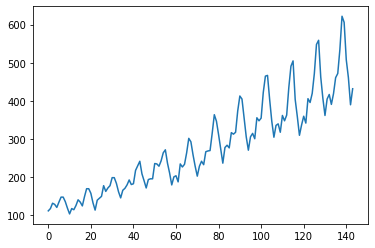

In [104]:
# use plot function with numpy array
mass = df_flights.passengers.values
plt.plot(mass)
plt.show()

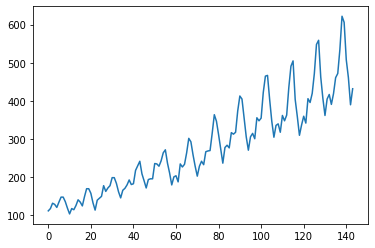

In [105]:
# use plot function with series
plt.plot(df_flights.passengers)
plt.show()

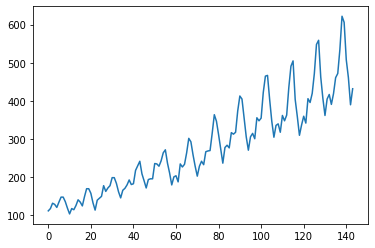

In [106]:
# plot methods in series
df_flights.passengers.plot()
plt.show()

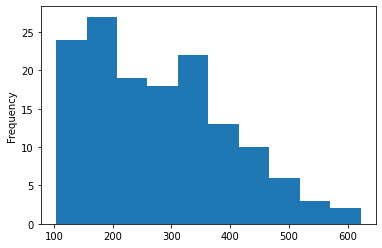

In [107]:
df_flights.passengers.plot(kind='hist')
plt.show()

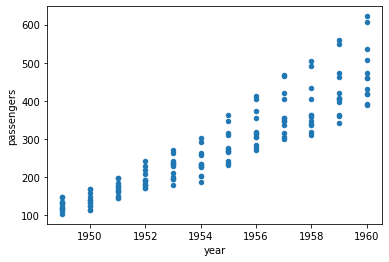

In [108]:
df_flights.plot(kind = 'scatter', x = 'year', y = 'passengers')
plt.show()

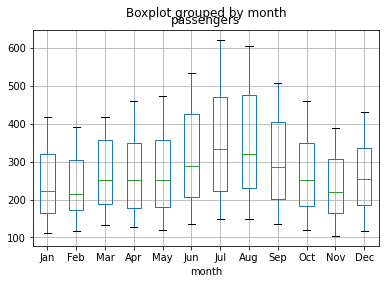

In [109]:
df_flights.boxplot(column='passengers', by='month')
plt.show()

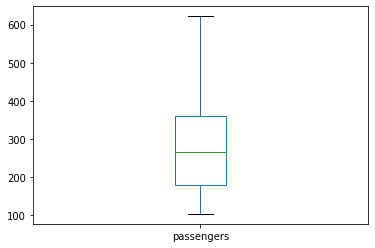

In [110]:
df_flights.plot(kind = 'box', y = 'passengers')
plt.show()

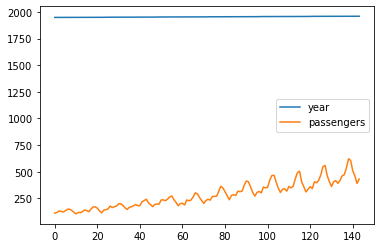

In [111]:
# plot methods in data frame would plot all the numeric columns on the same axis
df_flights.plot()
plt.show()

In [112]:
np.arange(len(df_flights)+1, step = 3)
#np.arange

array([  0,   3,   6,   9,  12,  15,  18,  21,  24,  27,  30,  33,  36,
        39,  42,  45,  48,  51,  54,  57,  60,  63,  66,  69,  72,  75,
        78,  81,  84,  87,  90,  93,  96,  99, 102, 105, 108, 111, 114,
       117, 120, 123, 126, 129, 132, 135, 138, 141, 144])

### Customization
#### Edit x axis and figure size

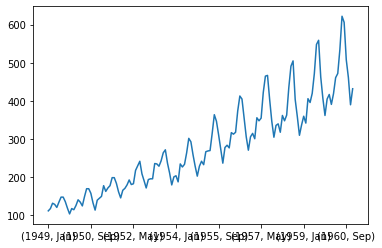

In [113]:
df_flights.index = df_flights[['year', 'month']]
df_flights.passengers.plot()
# plt.xticks(np.arange(len(df_flights) + 1, step = 6), 
#            df_flights.index[::3], 
#            rotation=45)
#plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [20, 5]
plt.show()

#### zoom in

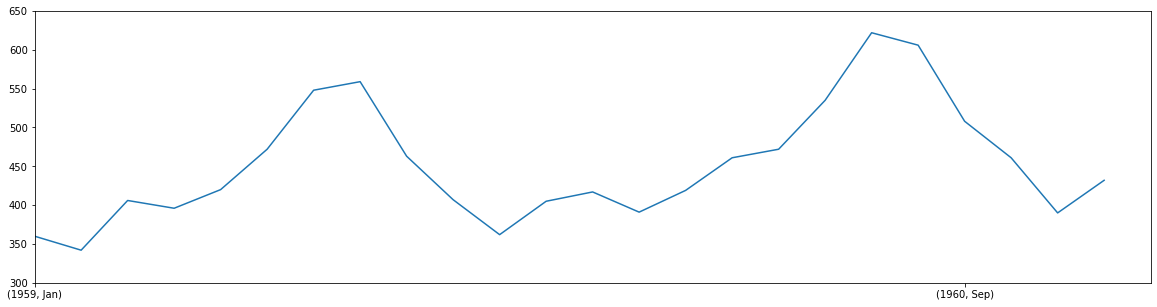

In [114]:
plt.clf()
df_flights.index = df_flights[['year', 'month']]
df_flights.passengers.plot()
# plt.xticks(np.arange(len(df_flights)+1, step = 3), 
#            df_flights.index[::3], 
#            rotation=45)
plt.axis([120, 144, 300, 650])
plt.show()

In [115]:
df_flights.head()

,year,month,passengers
"(1949, Jan)",1949,Jan,112
"(1949, Feb)",1949,Feb,118
"(1949, Mar)",1949,Mar,132
"(1949, Apr)",1949,Apr,129
"(1949, May)",1949,May,121


#### subplot

In [116]:
df_diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [117]:
plt.clf()

<Figure size 1440x360 with 0 Axes>

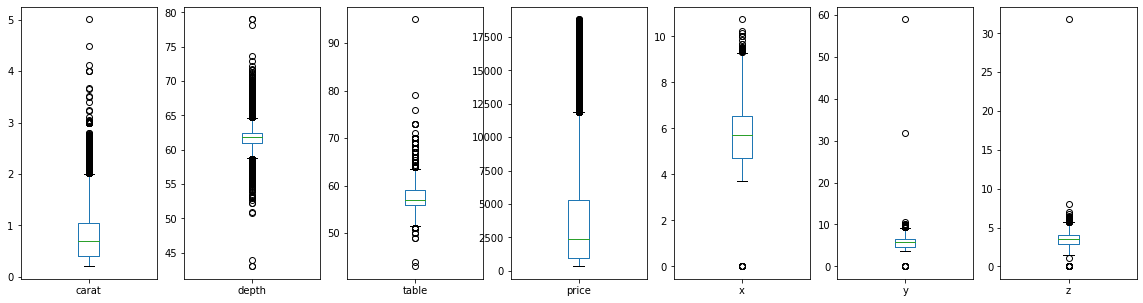

In [118]:
df_diamonds.plot(subplots=True, kind='box')
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

### DataFrame Plot Idioms

Three different DataFrame plot idioms where syntax and results differ.
- x.plot(kind='hist')
- x.plt.hist()
- x.hist()

In [119]:
df_iris = sns.load_dataset('iris')
sepal_length = df_iris[['sepal_length']]

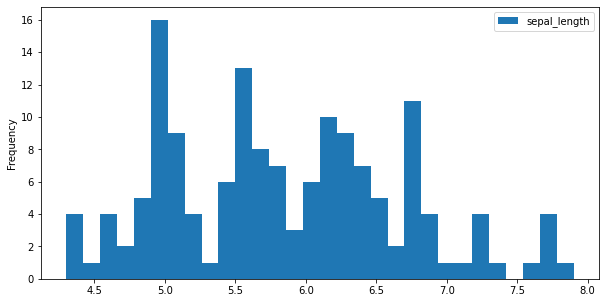

In [120]:
sepal_length.plot(kind='hist', bins=30)
plt.show()

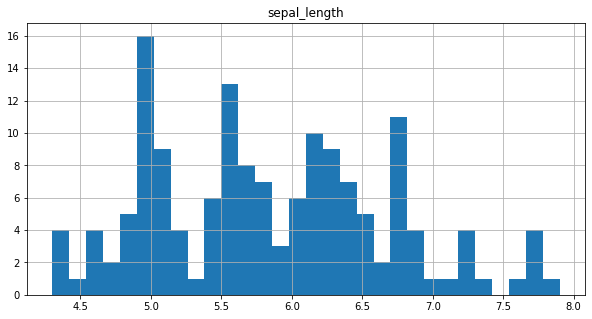

In [121]:
sepal_length.hist(bins=30)
plt.show()

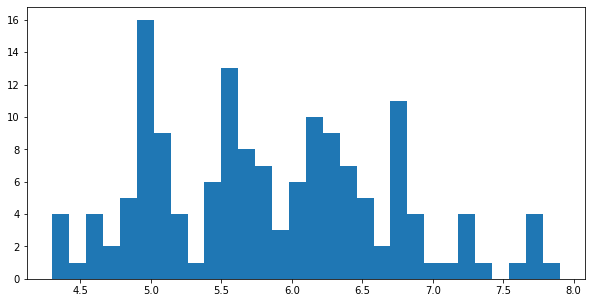

In [122]:
plt.hist(sepal_length, bins=30)
plt.show()

### PDF and CDF

In [123]:
df_tips = sns.load_dataset('tips')
df_tips['fraction'] = df_tips.tip/df_tips.total_bill
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size,fraction
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


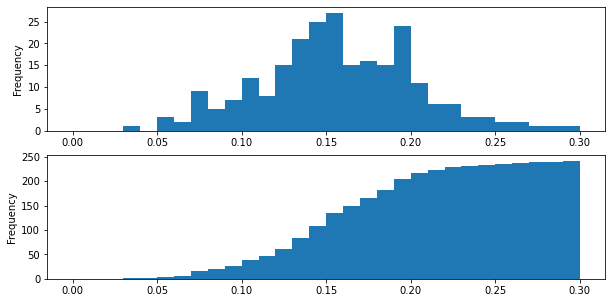

In [124]:
# This formats the plots such that they appear on separate rows
fig, axes = plt.subplots(nrows=2, ncols=1)

# Plot the PDF
df_tips.fraction.plot(ax=axes[0], kind='hist', bins=30, 
                      #normed=True, 
                      range=(0,.3))

# Plot the CDF
df_tips.fraction.plot(ax=axes[1], kind='hist', bins=30, 
                      #normed=True, 
                      cumulative=True, range=(0,.3))
plt.show()